### HASHTABLES

Vamos começar nossos estudos de uma das estruturas mais quentes e requisitadas em quase todas as entrevistas em grandes empresas. Compreender hashtables não só vai fazer com que você se torne um programador(a) muito melhor mas também vai aumentar em muito o seu nível de compreenção (e malandragrem) na hora de desenhar algoritmos.


### Mas porque raios estou aprendendo isso ?

Bom, não só você tem uma prova sobre esse conteúdo (rsrs) mas também hashtables (e os conceitos envolvidos nela) são largamento aplicados na industria. Sistemas de caching, load balancers, criptomoedas... tudo isso usa em algum ponto alguns desses conceitos!

### TL;TR

Bora lá, coloca o miojo no fogo e vamos passar rapidinho sobre o que é uma hashtable.

Praticamente hashtable é uma estrutura de dados que consegue fazer buscas e inserções em tempo **médio** constante. 

A ideia de uma hashtable é pegar uma determinada chave, enviar essa chave para uma função de hashing que irá retornar um número referente a essa chave e após isso endereçamos esse número a um vetor usando um pouco de aritmética modular.

A função de hashing pode gerar o mesmo número para diferentes chaves e portanto o endereçamento no vetor será o mesmo, para esse fenômeno damos o nome de **colisão**.


Isso é apenas um resumo bem por cima sobre o conceito, vamos discutir mais nas próximas secções.


# Introdução a Hash tables


A ideia da tabela hash é muito semelhante à consulta de vetores. Uma tabela hash consiste em uma tabela (implementada por um vetor) que tem um determinado endereço, essa tabela tem um determinado tamanho dentro da memória.

Python

```python3

hashtable = [0]*100
```

C
```c
int hashtable[100];
```


A vantagem de implementarmos como um vetor é que podemos consultar um endereço em tempo constante usando **hashtable[i]**. 

Até esse ponto a tabela hash não se diferencia nada em comparação com o vetor, e é ae que os algoritmos de hashing entram. O algoritmo de hashing é capaz de pegar um elemento qualquer e endereçar o mesmo para um endereço da tabela. 

# Vamos falar sobre funções 

Antes de continuarmos, queria muito revisar um determinado tipo de funções com vocês, as funções sobrejetoras!

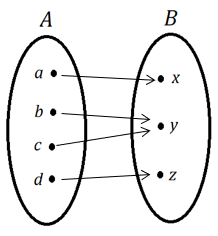

Bom... essa é a revisão!

Brincadeira, como visto na imagem as funções sobrejetoras tem a caracteristica especial de conseguir mapear diferentes números para o mesmo contradominio. Quer um exemplo de função sobrejetora e um exemplo desse mapeamento ? Rode a celula abaixo.

In [7]:
def f(x):
    N = 4
    return x%N

print(f(5))
print(f(9))

1
1


Essa função é particurlamente interessante porque podemos pegar um número absurdo e colocar em um espaço muito menor!

In [15]:
f(3**25) # 3^25

3

## Hashing

Segundo a [wikedia(US)](https://en.wikipedia.org/wiki/Hash_function): *A hash function is any function that can be used to map data of arbitrary size to fixed-size values*. 

Em resumo, uma função de hashing é uma função sobrejetora. E isso vai ser útil pois como definimos anteriormente, uma tabela hash tem a capacidade de inserir em seu espaço de endereçamento elementos muito maiores.

Por exemplo, considere uma tabela de 6 elementos em que função de hash é dada por **f(x) = x%N** e estamos inserindo o número 200 nessa tabela. A visualização dessa inserção é exemplificada pela seguinte imagem.

 ![exemplo1](img/hash_example1.png)
 
 Como podemos ver, conseguimos inserir o número 200 em um espaço muito menor. E agora se quisermos consultar se o 200 esta na lista apenas precisamos fazer o hash e consultar a célula no endereço dado.
 

### Introdução a colisão

Porém nem tudo são flores, assim como 200 pode ir para o endereço 2 também iremos querer inserir elementos que tem o mesmo valor no hash (mesmo endereço na tabela) em nossa tabela. Um exemplo é o valor 8, 14, 32... todos iriam ao mesmo endereço e isso causaria o que chamamos de **colisão**

## Como podemos resolver colisões ?

Existem três formas principais de resolver colisões, vou demoninar essas técnicas pela tradução direta do livro livro texto.

* Separate Chain
* Linear probing
* Double Hashing

Vamos conversar sobre cada uma delas

### Cadeia Sparada 

A cadeira separada tem um conceito bem simples, para cada colisão em um endereço da nossa tabela principal criamos uma estrutura de dados que salva todos os elementos com o mesmo endereço. Essa estrutura de dados podem ser qualquer estrutura como uma árvore binária, lista ou outra estrutura de busca. 

O grande problema com esse método é que temos um overhead maior no uso da memória, precisamos além de salvar a tabela também mantermos essa estrutura. A escolha da estrutura também pode afetar no custo de memória, por exemplo uma árvore binária vai consumir o dobro de ponteiros que uma lista simples.

É importante dizer que a ideia da hash table consiste em diminuir o número de colisões e quando elas acontecem, trata-las de forma graciosa. Isso quer dizer que uma tabela bem implementada vai sempre tentar ter menos colisões possíveis e portanto, uma estrutura de dados como árvores pode não se valer, pois provavelmente terão poucos elementos dentro de sua estrutura. Objetivamente, listas encadeadas são uma boa alternativa.

In [ ]:
Em python essa implementação ficaria assim

In [23]:
from typing import List
Vector = List # em python, listas são implementas em blocos (vetores) então vamos dar essa licença poética

N = 10
# apenas cria um vetor, acredite em mim
hashtable: Vector[List[int]] = [[] for _ in range(N)]


def hash_f(x):
    return x%N

def insert_element(element: int) -> None:
    address:int  = hash_f(element)

    hashtable[address].append(element)

insert_element(200)
insert_element(20)
insert_element(21)

print(hashtable)


[[], [], [], [], [], [], [], [], [], []]
[[200, 20], [21], [], [], [], [], [], [], [], []]


Como podemos observar, o número 200 e 20 foi salvo na mesma cadeia no indice 0 enquanto o número 21 foi salvo no endereço 1

Preciso adicionar uma implementação em C futuramente.

### Linear Probing

Linear probing resolve as colisões sem adicionar uma outra estrutura, portanto esse método tem um custo menor de memória. 

Quando existe uma colisão o elemento que esta colidindo é inserido em um endereço **(i + K)%N** na mesma tabela e esse processo é feito até encontrar um endereço vazio (cuidado pois pode ocorrer um loop aqui). K é um número que podemos escolher de várias formas diferentes, como por exemplo.

* K = 1, praticamente insere na proxima casa
* K, sendo um número natural qualquer... então insere K casas depois 
* K = i^2, bom eu acho que vc já entendeu. Esse aqui chamamos de quadratic probing

Vamos exemplificar rapidamente isso.

In [53]:
from typing import List
Vector = List # em python, listas são implementas em blocos (vetores) então vamos dar essa licença poética

N = 10
# cria um vetor apontando para None
hashtable: Vector[List[int]] = [None for _ in range(N)]

def hash_f(x):
    return x%N

def insert_element(element: int) -> None:
    address:int  = hash_f(element)
        
    # vamos tentar inserir apenas 3 vezes
    # se não conseguirmos vamos apenas mostrar
    # uma mensagem
    for _ in range(3):
        if hashtable[address] == None:
            hashtable[address] = element
            break
        else:
            # quadratic probing
            address = (address + address**2)%N

insert_element(200)
insert_element(20)
insert_element(21)
insert_element(41)
insert_element(41)


print(hashtable)

[200, 21, 41, None, None, None, 41, None, None, None]


### Clustering

WIP

### Double Hashing
WIP

### Provas matemáticas

WIP